In [11]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
## Supp_Figure_2e --- ---

0.7699435938759065
0.7849852269674994


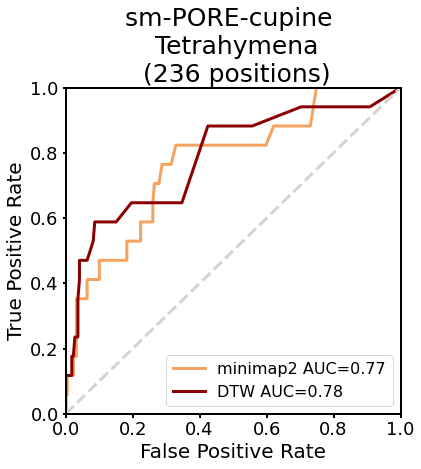

<Figure size 432x288 with 0 Axes>

In [12]:
dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig2/Data/'
safa_allinfo = pd.read_csv('/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig2/Data/safa_tetra.txt', sep='\t')

df_reac1 = pd.read_csv(dir_out+'tetrahymena_reactivity_sm-PORE-cupine_minimap2.txt',sep='\t')
df_reac2 = pd.read_csv(dir_out+'tetrahymena_reactivity_sm-PORE-cupine_dtw.txt',sep='\t')

df1 = pd.merge(df_reac1,safa_allinfo, how='inner',on=['Position','Position'])
flt1 = df1
df2 = pd.merge(df_reac2,safa_allinfo, how='inner',on=['Position','Position'])
flt2 = df2


df1 = pd.merge(df_reac1,safa_allinfo, how='inner',on=['Position','Position'])
flt1 = df1[(df1['Grp'] == 2)|(df1['Grp'] == 3)|(df1['Grp'] == 4)]
df2 = pd.merge(df_reac2,safa_allinfo, how='inner',on=['Position','Position'])
flt2 = df2[(df2['Grp'] == 2)|(df2['Grp'] == 3)|(df2['Grp'] == 4)]

# condition_1
fpr_1, tpr_1, thresholds_1 = metrics.roc_curve(flt1.strand, flt1.mod_rate, pos_label=1)
roc_auc_1 = metrics.auc(fpr_1, tpr_1)
print(roc_auc_1)

fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(flt2.strand, flt2.mod_rate, pos_label=1)
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
print(roc_auc_2)

# plot -----
    
fig, (ax) = plt.subplots(1, 1, figsize = (6, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(width = 2)
    
plt.title('sm-PORE-cupine \n Tetrahymena'+'\n ('+str(flt1.shape[0])+' positions)', fontsize = 25)
plt.plot(fpr_1, tpr_1, color = 'sandybrown', linewidth = 3.0, label = 'minimap2 AUC=%0.2f' % roc_auc_1,)
plt.plot(fpr_2, tpr_2, color = 'darkred', linewidth = 3.0, label = 'DTW AUC=%0.2f' % roc_auc_2,)

plt.legend(loc = 'lower right', fontsize = 16)
#plt.legend(loc='upper left', bbox_to_anchor=(1.03, 0.5),prop={'size': 16})
plt.plot([0, 1], [0, 1], color = 'lightgrey', linewidth = 3.0, linestyle = 'dashed')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig2/Data/'
plt.savefig(dir_out+'Supp_Figure_2e_tetrahymena_against_SAFA_sm_ROC_minimap2_vs_DTW.pdf', bbox_inches='tight', dpi=300) 